### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### `Objective:`
- To implement the techniques learnt as a part of the course.

#### `Link to Github repository:`
https://github.com/InnaG33/MovieLens_DA

### `Datasets Information:`

*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating

*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)


*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use

**`Please provide your insights wherever necessary.`**

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### 1. Importing the necessary packages - 2.5 m.

In [1]:
# dependacies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from scipy.stats import zscore


### 2. Reading the 3 datasets into dataframes - 2.5 m.

In [37]:
# read the data
Data_df  = pd.read_csv('Data.csv') 
item_df  = pd.read_csv('item.csv') 
user_df  = pd.read_csv('user.csv') 


In [3]:
Data_df.head()


,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
item_df.head()


,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [5]:
user_df.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


### 3. Applying info, shape, describe, and find the number of missing values in the data. Present at least 3 observations from these operations - 2.5 m.


In [6]:
Data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user id      100000 non-null int64
movie id     100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [7]:
item_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
movie id        1681 non-null int64
movie title     1681 non-null object
release date    1681 non-null object
unknown         1681 non-null int64
Action          1681 non-null int64
Adventure       1681 non-null int64
Animation       1681 non-null int64
Childrens       1681 non-null int64
Comedy          1681 non-null int64
Crime           1681 non-null int64
Documentary     1681 non-null int64
Drama           1681 non-null int64
Fantasy         1681 non-null int64
Film-Noir       1681 non-null int64
Horror          1681 non-null int64
Musical         1681 non-null int64
Mystery         1681 non-null int64
Romance         1681 non-null int64
Sci-Fi          1681 non-null int64
Thriller        1681 non-null int64
War             1681 non-null int64
Western         1681 non-null int64
dtypes: int64(20), object(2)
memory usage: 289.0+ KB


In [8]:
user_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [9]:
print(f"Shape of the ratings (Data): {Data_df.shape}, then items {item_df.shape} and user info {user_df.shape}")


Shape of the ratings (Data): (100000, 4), then items (1681, 22) and user info (943, 5)


In [10]:
Data_df.describe().T


,count,mean,std,min,25%,50%,75%,max
user id,100000.0,4.624848e+02,2.666144e+02,1.0,254.0,447.0,682.0,943.0
movie id,100000.0,4.255301e+02,3.307984e+02,1.0,175.0,322.0,631.0,1682.0
rating,100000.0,3.529860e+00,1.125674e+00,1.0,3.0,4.0,4.0,5.0
timestamp,100000.0,8.835289e+08,5.343856e+06,874724710.0,879448709.5,882826944.0,888259984.0,893286638.0


In [11]:
Data_df.isna().values.any()


False

In [12]:
#just to double check there are not NaN values
Data_df.dropna(inplace=True)


In [13]:
len(Data_df)


100000

In [14]:
Data_df.isnull().values.any()


False

In [15]:
item_df.describe().T


,count,mean,std,min,25%,50%,75%,max
movie id,1681.0,841.841761,485.638077,1.0,422.0,842.0,1262.0,1682.0
unknown,1681.0,0.000595,0.024390,0.0,0.0,0.0,0.0,1.0
Action,1681.0,0.149316,0.356506,0.0,0.0,0.0,0.0,1.0
Adventure,1681.0,0.080309,0.271852,0.0,0.0,0.0,0.0,1.0
Animation,1681.0,0.024985,0.156126,0.0,0.0,0.0,0.0,1.0
Childrens,1681.0,0.072576,0.259516,0.0,0.0,0.0,0.0,1.0
Comedy,1681.0,0.300416,0.458576,0.0,0.0,0.0,1.0,1.0
Crime,1681.0,0.064842,0.246321,0.0,0.0,0.0,0.0,1.0
Documentary,1681.0,0.029744,0.169931,0.0,0.0,0.0,0.0,1.0
Drama,1681.0,0.431291,0.495404,0.0,0.0,0.0,1.0,1.0


In [16]:
item_df.isna().values.any()


False

In [17]:
user_df.describe().T


,count,mean,std,min,25%,50%,75%,max
user id,943.0,472.000000,272.364951,1.0,236.5,472.0,707.5,943.0
age,943.0,34.051962,12.192740,7.0,25.0,31.0,43.0,73.0


In [18]:
user_df.isna().values.any()


False

In [19]:
user_df.isnull().values.any()

False

In [20]:
item_df.isnull().values.any()

False

### Initial observation on the data quality

#### Data table:
All integers, no NaN or Zero values;
Number of entries: 100,000, when various users rated various movies. One user can rate number of movies; one movie can be rated by number of users. Average rating is 4, with mean value close to median value.

#### Item table:
No NaN or Zero values;
Number of entries: data on 1681 movies: title, release year and genres, encoded.

#### User table:
No NaN or Zero values;
Number of entries: data on 943 users: id, gender, age, occupation and zipcode.

### 4. Finding the number of movies per genre using the item data - 2.5 m.

In [21]:
item_df.keys()


Index(['movie id', 'movie title', 'release date', 'unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [26]:
genres=item_df.drop(['movie id', 'movie title', 'release date', 'unknown'], axis=1)
number_per_genre=pd.DataFrame(genres.sum())
number_per_genre

,0
Action,251
Adventure,135
Animation,42
Childrens,122
Comedy,505
Crime,109
Documentary,50
Drama,725
Fantasy,22
Film-Noir,24


In [29]:
number_per_genre.rename(columns={0:"number_movies"}, inplace=True)
number_per_genre

,number_movies
Action,251
Adventure,135
Animation,42
Childrens,122
Comedy,505
Crime,109
Documentary,50
Drama,725
Fantasy,22
Film-Noir,24


In [30]:
number_per_genre.sum()

number_movies    2891
dtype: int64

In [31]:
number_per_genre.min()

number_movies    22
dtype: int64

In [32]:
number_per_genre.max()

number_movies    725
dtype: int64

**Insights:**

Some movies have number of genres, and not just one.
The most popular genres are: Comedy, Romance, Thriller and Drama, when Drama has the maximal number of movies. Fantasy has the lowest number of movies.

### 5. Droping the movie where the genre is unknown - 2.5 m.

In [38]:
item_df['unknown'].sum()

1

In [43]:
item_df['movie title'].loc[(item_df['unknown']==1)]

1371    Good Morning 
Name: movie title, dtype: object

In [44]:
len(item_df)

1681

In [45]:
item_df.drop(1371, axis=0, inplace=True)
len(item_df)

1680

In [46]:
item_df['unknown'].sum()

0

In [47]:
item_df.drop(['unknown'], axis=1, inplace=True)
item_df.keys()


Index(['movie id', 'movie title', 'release date', 'Action', 'Adventure',
       'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [66]:
item_df.reset_index(inplace=True)

**Insights:**
One movie had unknown genre, which has title "Good Morning".

### 6. Finding the movies that have more than one genre - 5 m.


In [48]:
item_df.head(3)


,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [49]:
item_df.iloc[3, 3:].sum()


3

In [50]:
movie_index = list(range(len(item_df)))
#movie_index

In [51]:
type(movie_index)

list

In [52]:
mul__genres_movies=pd.DataFrame(columns=['movie id', 'movie title', 'release date', 'number_of_genres'], index=movie_index)
mul__genres_movies


,movie id,movie title,release date,number_of_genres
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
1675,NaN,NaN,NaN,NaN
1676,NaN,NaN,NaN,NaN
1677,NaN,NaN,NaN,NaN
1678,NaN,NaN,NaN,NaN


In [53]:
item_df.iloc[0, 3:].sum()

3

In [54]:
for i in range(len(item_df)):
    
    rsum = item_df.iloc[i, 3:].sum()
    
    if rsum >=2:
        mul__genres_movies.iloc[i, 0:3]=item_df.iloc[i, 0:3]
        mul__genres_movies.iloc[i, 3]=rsum
        

In [55]:
mul__genres_movies.head()


,movie id,movie title,release date,number_of_genres
0,1,Toy Story,01-Jan-1995,3
1,2,GoldenEye,01-Jan-1995,3
2,NaN,NaN,NaN,NaN
3,4,Get Shorty,01-Jan-1995,3
4,5,Copycat,01-Jan-1995,3


In [56]:
mul__genres_movies.dropna(inplace=True)
mul__genres_movies.head()

,movie id,movie title,release date,number_of_genres
0,1,Toy Story,01-Jan-1995,3
1,2,GoldenEye,01-Jan-1995,3
3,4,Get Shorty,01-Jan-1995,3
4,5,Copycat,01-Jan-1995,3
6,7,Twelve Monkeys,01-Jan-1995,2


In [57]:
len(mul__genres_movies)


849

**Insights:**

From 1680 movies, 849 have multiple genres associated with them.

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 m.

* Distplot for age and countplot for release year, ratings, *

* The snippet below to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

In [58]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])


brown
brown
brown


In [59]:
relyear=item_df['release date'].to_list()


In [60]:
item_df['release date'].head(3)

0    01-Jan-1995
1    01-Jan-1995
2    01-Jan-1995
Name: release date, dtype: object

In [61]:
type(relyear)

list

In [62]:
int(relyear[0].split('-')[2])

1995

In [63]:
int(item_df.loc[0, 'release date'].split('-')[2])


1995

In [64]:
print(f"converted year is {a}, with type {type(a)}")

converted year is My*cat*is*brown, with type <class 'str'>


In [67]:
for i in range(len(item_df)):
    item_df.loc[i,'release date_converted']=int(item_df.loc[i,'release date'].split('-')[2])
    
item_df.head(3)

,index,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release date_converted
0,0,1,Toy Story,01-Jan-1995,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995.0
1,1,2,GoldenEye,01-Jan-1995,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995.0
2,2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995.0


In [68]:
user_df.head(3)

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067


In [69]:
len(user_df)

943

In [70]:
len(item_df)

1680

In [71]:
Data_df.head(3)

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116


In [72]:
user_moveid=pd.merge(user_df, Data_df, on='user id', how='inner')
user_moveid.head(3)

,user id,age,gender,occupation,zip code,movie id,rating,timestamp
0,1,24,M,technician,85711,61,4,878542420
1,1,24,M,technician,85711,189,3,888732928
2,1,24,M,technician,85711,33,4,878542699


In [73]:
len(user_moveid)

100000

In [74]:
users_movies=pd.merge(user_moveid, item_df, on='movie id', how='inner')
users_movies.head(3)

,user id,age,gender,occupation,zip code,movie id,rating,timestamp,index,movie title,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release date_converted
0,1,24,M,technician,85711,61,4,878542420,60,Three Colors: White,...,0,0,0,0,0,0,0,0,0,1994.0
1,13,47,M,educator,29206,61,4,882140552,60,Three Colors: White,...,0,0,0,0,0,0,0,0,0,1994.0
2,18,35,F,other,37212,61,4,880130803,60,Three Colors: White,...,0,0,0,0,0,0,0,0,0,1994.0


In [75]:
len(users_movies)


99990

In [76]:
#users_movies.to_csv("combined_data.csv")

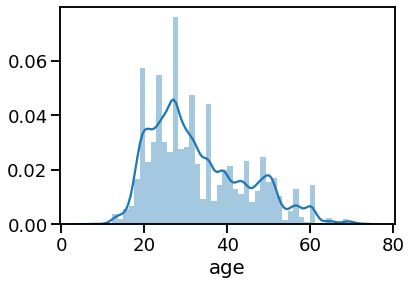

In [77]:
#distplot for age and countplot for release year, ratings
with sns.plotting_context("talk", font_scale=1.1):
    sns.distplot(users_movies['age'])
    plt.show()


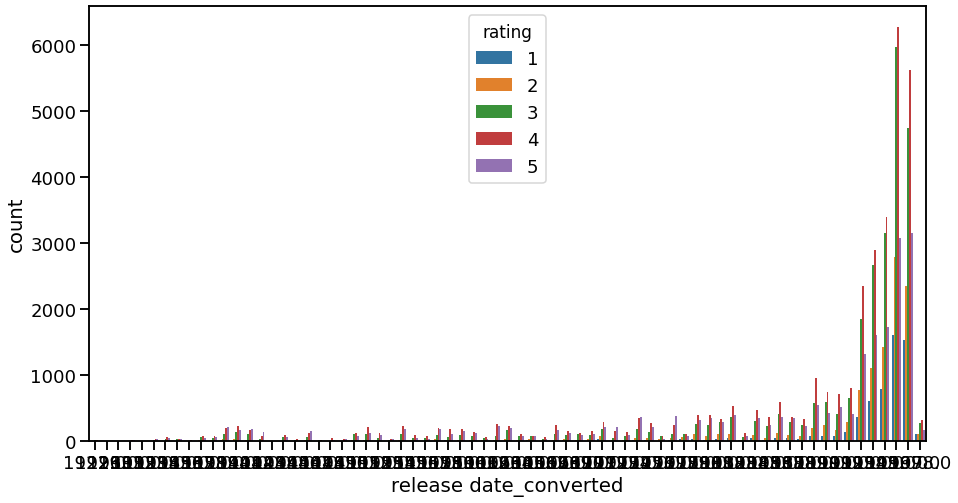

In [80]:
# countplots 
with sns.plotting_context("talk", font_scale=1.1):

    plt.figure(figsize=(15,8))
    ax = sns.countplot(x="release date_converted", hue="rating", data=users_movies)
    plt.show()


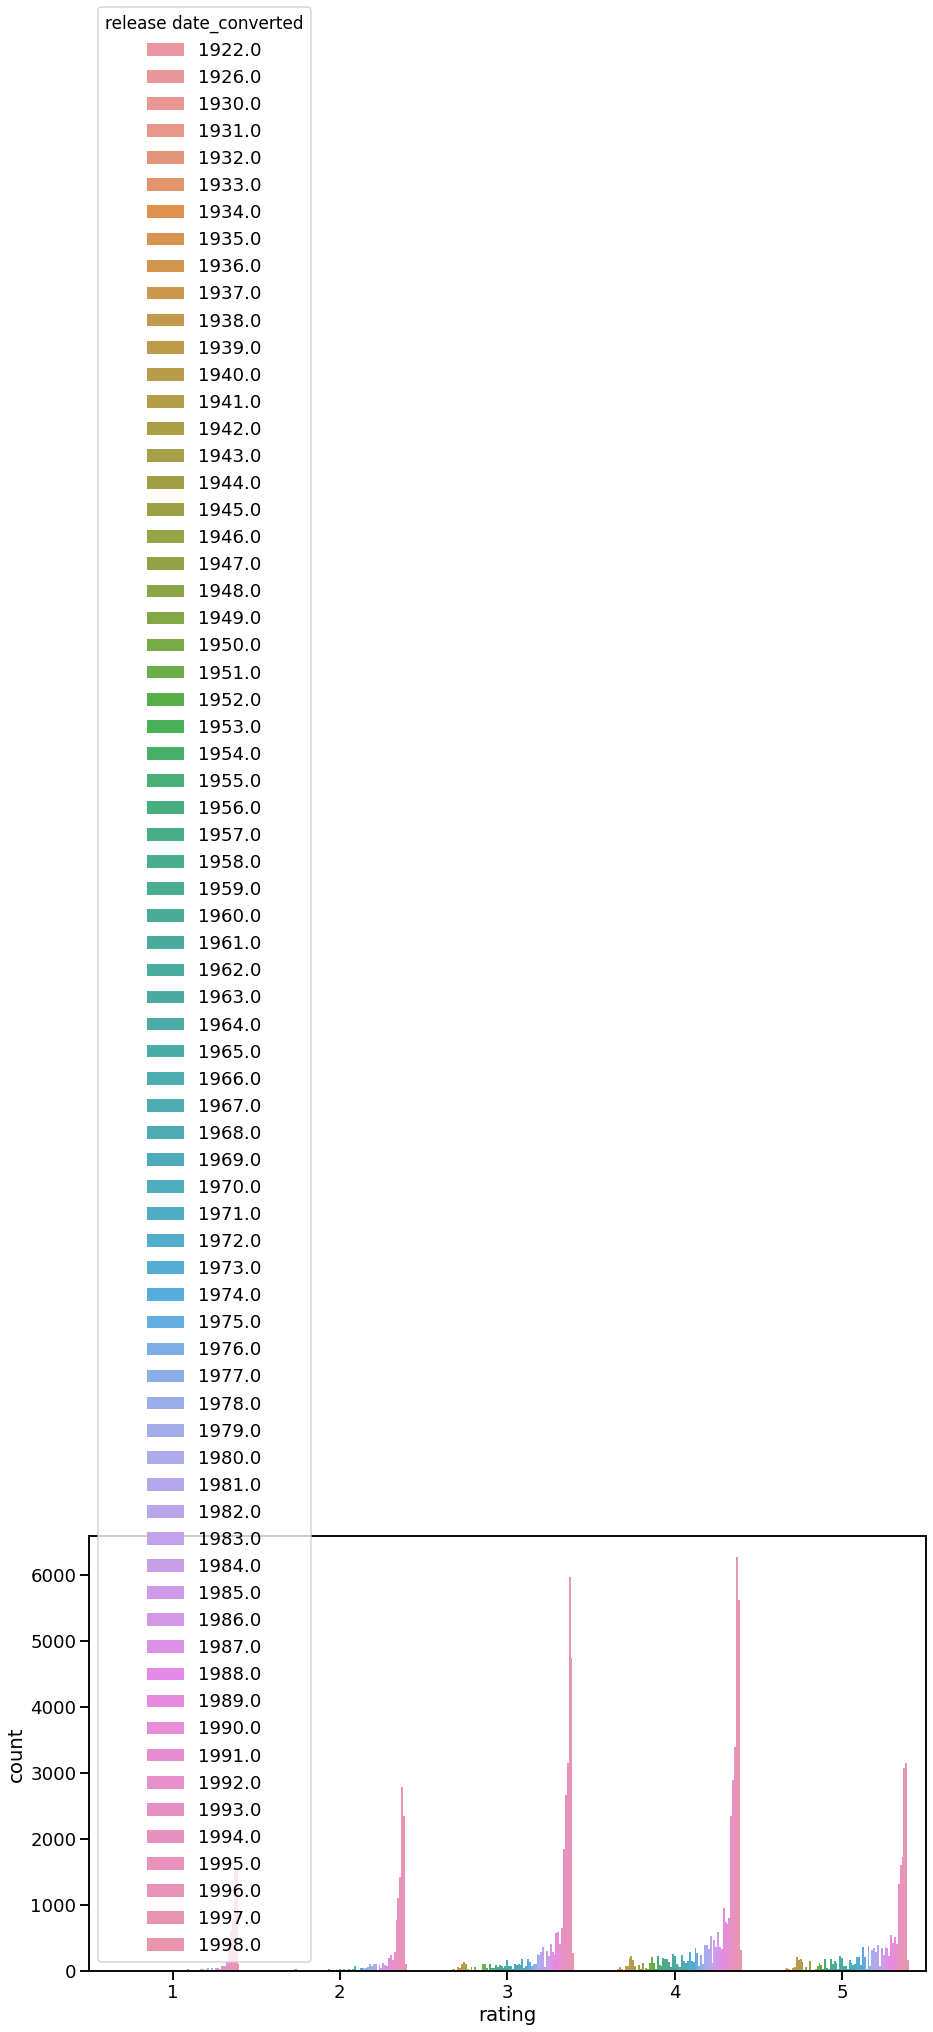

In [81]:
with sns.plotting_context("talk", font_scale=1.1):
    
    plt.figure(figsize=(15,8))
    ax = sns.countplot(x="rating", hue="release date_converted", data=users_movies)
    plt.show()


**Insights:**

Age is positively skewed (to the right), with mean=34 > median=31.

The most rated movies are from the latest release yaers, above 1980; while older movies have significantly lower number of ratings (by factor of 10 at least). 
Ratings "3" and "4" are the most common values. 

### 8. Visualizing how popularity of genres has changed over the years - 10 m.

Lines below are to find **percent of number of releases in a year** as a parameter of popularity of a genre


In [90]:
rel_year_df = users_movies.groupby(['release date_converted']).sum()
rel_year_df

,user id,age,movie id,rating,timestamp,index,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release date_converted,,,,,,,,,,,,,,,,,,,,,
1922.0,26298,1884,36450,192,47820583775,36342,0,0,0,0,...,0,0,54,0,0,0,0,0,0,0
1926.0,894,54,3084,6,1770986235,3080,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1930.0,6934,851,11106,68,15909502609,11070,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1931.0,19853,1668,28864,176,38917362988,28776,0,0,0,0,...,0,44,0,0,0,0,0,44,0,0
1932.0,6739,507,13488,46,10593890276,13464,0,0,0,0,...,0,0,0,0,0,12,0,0,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994.0,4030900,283853,3666372,30456,7854814421865,3652736,1741,878,244,605,...,211,0,375,237,109,2367,358,1521,499,319
1995.0,4797450,329725,4445319,35347,9270393621784,4428502,2328,1018,550,1118,...,157,57,294,113,140,2455,1108,2456,282,60
1996.0,9059617,633156,9242677,65520,17398161663655,9210209,4573,2793,748,1038,...,458,82,962,852,613,3477,1678,4496,1832,87


In [94]:
rel_year_df.drop('index', axis=1, inplace=True)
rel_year_df.head(3)

,user id,age,movie id,rating,timestamp,Action,Adventure,Animation,Childrens,Comedy,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total_rel
release date_converted,,,,,,,,,,,,,,,,,,,,,
1922.0,26298,1884,36450,192,47820583775,0,0,0,0,0,...,0,54,0,0,0,0,0,0,0,0
1926.0,894,54,3084,6,1770986235,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1930.0,6934,851,11106,68,15909502609,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
rel_year_cnt = users_movies.groupby(['release date_converted']).count()
rel_year_cnt

,user id,age,gender,occupation,zip code,movie id,rating,timestamp,index,movie title,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release date_converted,,,,,,,,,,,,,,,,,,,,,
1922.0,54,54,54,54,54,54,54,54,54,54,...,54,54,54,54,54,54,54,54,54,54
1926.0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1930.0,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
1931.0,44,44,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44
1932.0,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994.0,8893,8893,8893,8893,8893,8893,8893,8893,8893,8893,...,8893,8893,8893,8893,8893,8893,8893,8893,8893,8893
1995.0,10499,10499,10499,10499,10499,10499,10499,10499,10499,10499,...,10499,10499,10499,10499,10499,10499,10499,10499,10499,10499
1996.0,19708,19708,19708,19708,19708,19708,19708,19708,19708,19708,...,19708,19708,19708,19708,19708,19708,19708,19708,19708,19708


In [84]:
rel_year_avg = users_movies.groupby(['release date_converted']).mean()
rel_year_avg

,user id,age,movie id,rating,timestamp,index,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release date_converted,,,,,,,,,,,,,,,,,,,,,
1922.0,487.000000,34.888889,675.000000,3.555556,8.855664e+08,673.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1926.0,447.000000,27.000000,1542.000000,3.000000,8.854931e+08,1540.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1930.0,385.222222,47.277778,617.000000,3.777778,8.838613e+08,615.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1931.0,451.204545,37.909091,656.000000,4.000000,8.844855e+08,654.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
1932.0,561.583333,42.250000,1124.000000,3.833333,8.828242e+08,1122.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994.0,453.266614,31.918700,412.276172,3.424716,8.832581e+08,410.742831,0.195772,0.098729,0.027437,0.068031,...,0.023727,0.000000,0.042168,0.026650,0.012257,0.266164,0.040256,0.171033,0.056112,0.035871
1995.0,456.943518,31.405372,423.404038,3.366702,8.829787e+08,421.802267,0.221735,0.096962,0.052386,0.106486,...,0.014954,0.005429,0.028003,0.010763,0.013335,0.233832,0.105534,0.233927,0.026860,0.005715
1996.0,459.692358,32.126852,468.980972,3.324538,8.827969e+08,467.333519,0.232038,0.141719,0.037954,0.052669,...,0.023239,0.004161,0.048813,0.043231,0.031104,0.176426,0.085143,0.228131,0.092957,0.004414


In [95]:
rel_year_df.keys()

Index(['user id', 'age', 'movie id', 'rating', 'timestamp', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'total_rel'],
      dtype='object')

In [96]:
rel_year_df['total_rel']=0
rel_year_df.keys()

Index(['user id', 'age', 'movie id', 'rating', 'timestamp', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'total_rel'],
      dtype='object')

In [97]:
for i in range(len(rel_year_df)):
    rel_year_df.iloc[i, 23]=rel_year_df.iloc[i, 5:].sum()
    
rel_year_df.head()

,user id,age,movie id,rating,timestamp,Action,Adventure,Animation,Childrens,Comedy,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total_rel
release date_converted,,,,,,,,,,,,,,,,,,,,,
1922.0,26298,1884,36450,192,47820583775,0,0,0,0,0,...,0,54,0,0,0,0,0,0,0,54
1926.0,894,54,3084,6,1770986235,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1930.0,6934,851,11106,68,15909502609,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18
1931.0,19853,1668,28864,176,38917362988,0,0,0,0,0,...,44,0,0,0,0,0,44,0,0,132
1932.0,6739,507,13488,46,10593890276,0,0,0,0,0,...,0,0,0,0,12,0,0,12,0,24


In [99]:
#percent of number of releases in a year per genres

#divide the value of each genre in that year by total to get percentage number of release in a particular year. 
#(df.div(df['total'], axis= 0) * 100)

genres_per_year = rel_year_df.drop(['user id', 'age', 'movie id', 'rating', 'timestamp'], axis=1)
genres_per_year.head(3)

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total_rel
release date_converted,,,,,,,,,,,,,,,,,,,
1922.0,0,0,0,0,0,0,0,0,0,0,54,0,0,0,0,0,0,0,54
1926.0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2
1930.0,0,0,0,0,0,0,0,18,0,0,0,0,0,0,0,0,0,0,18


In [106]:
genres_per_year=genres_per_year.div(genres_per_year['total_rel'], axis=0) * 100

In [107]:
genres_per_year.head()

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total_rel
release date_converted,,,,,,,,,,,,,,,,,,,
1922.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,100.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,100.0
1926.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,100.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,100.0
1930.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,100.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,100.0
1931.0,0.0,0.0,0.0,0.0,0.0,33.333333,0.0,0.0,0.0,33.333333,0.0,0.0,0.0,0.0,0.0,33.333333,0.0,0.0,100.0
1932.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,50.0,0.0,0.000000,50.0,0.0,100.0


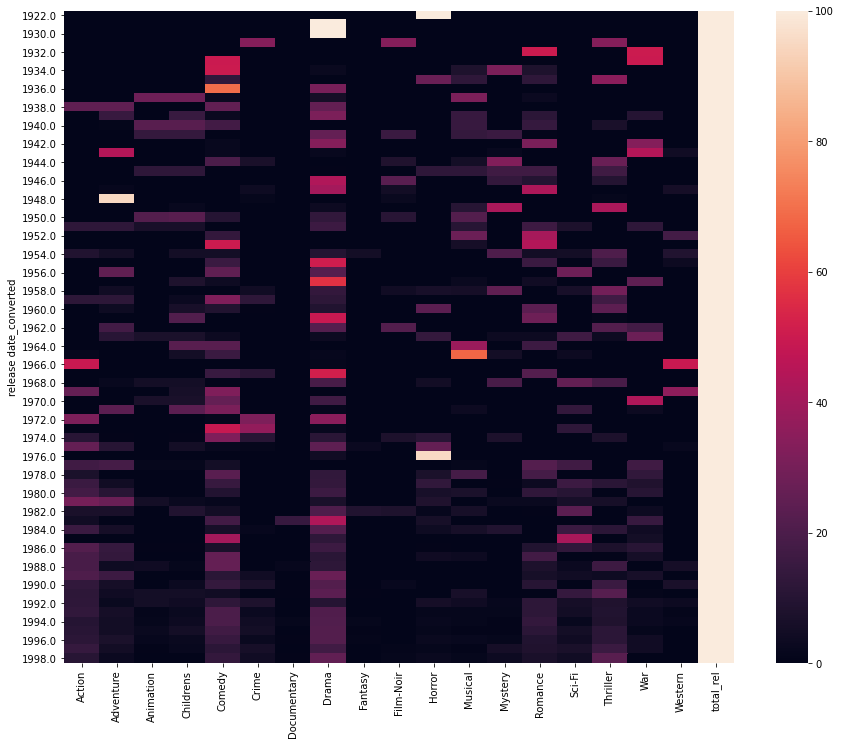

In [112]:
#the heatmap to visualise all the changes over the years in one go
fig,ax = plt.subplots(figsize=(15, 12))   
ax = sns.heatmap(genres_per_year)

**Insights:**

The popularity of Action, Comedy, Drama and Thriller is increasing with years. Drama genre had few picks in populuarity at around 1930, 1950s-1960s, and early 1980s. 

Intersting, Adventure genre was very polular in 1948, Musical peaked in 1965, and Horror genre got a popularity peak in 1976.

### 9. The top 25 movies in terms of average ratings for movies that have been rated more than 100 times - 10 m.

Steps : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. Use the .merge() function to get the movie titles.


In [113]:
users_movies.head(3)


,user id,age,gender,occupation,zip code,movie id,rating,timestamp,index,movie title,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release date_converted
0,1,24,M,technician,85711,61,4,878542420,60,Three Colors: White,...,0,0,0,0,0,0,0,0,0,1994.0
1,13,47,M,educator,29206,61,4,882140552,60,Three Colors: White,...,0,0,0,0,0,0,0,0,0,1994.0
2,18,35,F,other,37212,61,4,880130803,60,Three Colors: White,...,0,0,0,0,0,0,0,0,0,1994.0


In [114]:
users_movies.drop(['index'], axis=1, inplace=True)

In [115]:
users_movies['movie id'].value_counts()

50      583
258     509
100     508
181     507
294     485
       ... 
1681      1
1680      1
1616      1
1655      1
1663      1
Name: movie id, Length: 1680, dtype: int64

In [116]:
#1 count of ratings and average ratings for every movie
movies_cnt = users_movies.groupby(['movie id']).count()
movies_cnt

,user id,age,gender,occupation,zip code,rating,timestamp,movie title,release date,Action,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release date_converted
movie id,,,,,,,,,,,,,,,,,,,,,
1,452,452,452,452,452,452,452,452,452,452,...,452,452,452,452,452,452,452,452,452,452
2,131,131,131,131,131,131,131,131,131,131,...,131,131,131,131,131,131,131,131,131,131
3,90,90,90,90,90,90,90,90,90,90,...,90,90,90,90,90,90,90,90,90,90
4,209,209,209,209,209,209,209,209,209,209,...,209,209,209,209,209,209,209,209,209,209
5,86,86,86,86,86,86,86,86,86,86,...,86,86,86,86,86,86,86,86,86,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1679,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1680,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [120]:
movies_cnt_rating = pd.DataFrame(movies_cnt['rating'])
movies_cnt_rating

,rating
movie id,
1,452
2,131
3,90
4,209
5,86
...,...
1678,1
1679,1
1680,1


In [118]:
movies_avg = users_movies.groupby(['movie id']).mean()
movies_avg

,user id,age,rating,timestamp,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release date_converted
movie id,,,,,,,,,,,,,,,,,,,,,
1,477.011062,31.955752,3.878319,8.828054e+08,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995.0
2,492.007634,29.312977,3.206107,8.834174e+08,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1995.0
3,459.133333,27.011111,3.033333,8.822269e+08,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1995.0
4,469.497608,32.593301,3.550239,8.827175e+08,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995.0
5,439.372093,29.930233,3.302326,8.825882e+08,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,863.000000,17.000000,1.000000,8.892896e+08,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1998.0
1679,863.000000,17.000000,3.000000,8.892895e+08,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1998.0
1680,863.000000,17.000000,2.000000,8.892896e+08,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1998.0


In [121]:
movies_avg_rating=pd.DataFrame(movies_avg['rating'])
movies_avg_rating

,rating
movie id,
1,3.878319
2,3.206107
3,3.033333
4,3.550239
5,3.302326
...,...
1678,1.000000
1679,3.000000
1680,2.000000


In [126]:
movies_cnt_avg_rating = pd.merge(movies_cnt_rating, movies_avg_rating, on='movie id')
movies_cnt_avg_rating

,rating_x,rating_y
movie id,,
1,452,3.878319
2,131,3.206107
3,90,3.033333
4,209,3.550239
5,86,3.302326
...,...,...
1678,1,1.000000
1679,1,3.000000
1680,1,2.000000


In [127]:
movies_cnt_avg_rating.rename(columns={'rating_x':'num_ratings', 'rating_y':'avg_rating'}, inplace=True)
movies_cnt_avg_rating.head()

,num_ratings,avg_rating
movie id,,
1,452,3.878319
2,131,3.206107
3,90,3.033333
4,209,3.550239
5,86,3.302326


In [138]:
#Slice the movies which have ratings more than 100

movies_rating100 = pd.DataFrame(movies_cnt_avg_rating.loc[(movies_cnt_avg_rating['num_ratings']>=100)])
movies_rating100

,num_ratings,avg_rating
movie id,,
1,452,3.878319
2,131,3.206107
4,209,3.550239
7,392,3.798469
8,219,3.995434
...,...,...
928,104,3.115385
1012,100,3.530000
1016,137,3.459854


In [139]:
# Sort values according to average rating such that movie which highest rating is on top
movies_rating100_sorted = movies_rating100.sort_values(['avg_rating'], ascending=False)
movies_rating100_sorted

,num_ratings,avg_rating
movie id,,
408,112,4.491071
318,298,4.466443
169,118,4.466102
483,243,4.456790
64,283,4.445230
...,...,...
358,143,2.615385
260,127,2.574803
325,128,2.546875


In [144]:
# top 25 movies
movies_rating25 = movies_rating100_sorted.iloc[0:25, :]
movies_rating25

,num_ratings,avg_rating
movie id,,
408,112,4.491071
318,298,4.466443
169,118,4.466102
483,243,4.456790
64,283,4.445230
603,209,4.387560
12,267,4.385768
50,583,4.358491
178,125,4.344000


In [140]:
item_df.head(3)

,index,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release date_converted
0,0,1,Toy Story,01-Jan-1995,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995.0
1,1,2,GoldenEye,01-Jan-1995,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995.0
2,2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995.0


In [146]:
# get the movie titles by using merge
high_rated_titles = pd.merge(movies_rating25, item_df, on='movie id')
high_rated_titles.head()

,movie id,num_ratings,avg_rating,index,movie title,release date,Action,Adventure,Animation,Childrens,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release date_converted
0,408,112,4.491071,406,"Close Shave, A",28-Apr-1996,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1996.0
1,318,298,4.466443,316,Schindler's List,01-Jan-1993,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1993.0
2,169,118,4.466102,168,"Wrong Trousers, The",01-Jan-1993,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1993.0
3,483,243,4.456790,481,Casablanca,01-Jan-1942,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1942.0
4,64,283,4.445230,63,"Shawshank Redemption, The",01-Jan-1994,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1994.0


In [147]:
high_rated = high_rated_titles[['movie id', 'movie title', 'release date_converted', 'num_ratings', 'avg_rating']]
high_rated

,movie id,movie title,release date_converted,num_ratings,avg_rating
0,408,"Close Shave, A",1996.0,112,4.491071
1,318,Schindler's List,1993.0,298,4.466443
2,169,"Wrong Trousers, The",1993.0,118,4.466102
3,483,Casablanca,1942.0,243,4.456790
4,64,"Shawshank Redemption, The",1994.0,283,4.445230
5,603,Rear Window,1954.0,209,4.387560
6,12,"Usual Suspects, The",1995.0,267,4.385768
7,50,Star Wars,1977.0,583,4.358491
8,178,12 Angry Men,1957.0,125,4.344000
9,134,Citizen Kane,1941.0,198,4.292929


### 10. Checking for the validity of the below statements with respect to the data provided - 10 m.

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**comparing the percentages**


In [148]:
# 1. merged all datasets in above sections
users_movies.head(3)


,user id,age,gender,occupation,zip code,movie id,rating,timestamp,movie title,release date,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release date_converted
0,1,24,M,technician,85711,61,4,878542420,Three Colors: White,01-Jan-1994,...,0,0,0,0,0,0,0,0,0,1994.0
1,13,47,M,educator,29206,61,4,882140552,Three Colors: White,01-Jan-1994,...,0,0,0,0,0,0,0,0,0,1994.0
2,18,35,F,other,37212,61,4,880130803,Three Colors: White,01-Jan-1994,...,0,0,0,0,0,0,0,0,0,1994.0


In [149]:
users_movies.keys()

Index(['user id', 'age', 'gender', 'occupation', 'zip code', 'movie id',
       'rating', 'timestamp', 'movie title', 'release date', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western',
       'release date_converted'],
      dtype='object')

In [152]:
users_movies['gender'].value_counts(normalize=True)*100

M    74.259426
F    25.740574
Name: gender, dtype: float64

In [156]:
grouped_gender=users_movies.groupby(['gender']).sum()
grouped_gender

,user id,age,movie id,rating,timestamp,Action,Adventure,Animation,Childrens,Comedy,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release date_converted
gender,,,,,,,,,,,,,,,,,,,,,
F,12225832,831719,11452645,90894,22748573259055,5442,3141,995,2232,8068,...,385,1197,1442,1314,5858,2629,5086,2189,371,51177156.0
M,34019655,2464992,31096592,262060,65595552186588,20147,10612,2610,4950,21764,...,1348,4120,3512,3931,13603,10101,16786,7209,1483,147598603.0


In [165]:
grouped_gender_genre=grouped_gender.drop(['user id', 'age', 'rating', 'movie id', 'timestamp', 'release date_converted'], axis=1)
grouped_gender_genre

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
gender,,,,,,,,,,,,,,,,,,
F,5442,3141,995,2232,8068,1794,187,11008,363,385,1197,1442,1314,5858,2629,5086,2189,371
M,20147,10612,2610,4950,21764,6261,571,28887,989,1348,4120,3512,3931,13603,10101,16786,7209,1483


In [168]:
tot_genres = pd.DataFrame(grouped_gender_genre.sum(axis=1))
tot_genres

,0
gender,
F,53701
M,158884


In [169]:
tot_genres.rename(columns={0:'num_ratings'}, inplace=True)
tot_genres

,num_ratings
gender,
F,53701
M,158884


In [174]:
grouped_gender_genre_perc = grouped_gender_genre.div(tot_genres['num_ratings'], axis=0)*100
grouped_gender_genre_perc

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
gender,,,,,,,,,,,,,,,,,,
F,10.133889,5.849053,1.852852,4.156347,15.023929,3.340720,0.348224,20.498687,0.675965,0.716933,2.229009,2.685239,2.446882,10.908549,4.895626,9.47096,4.076274,0.690862
M,12.680320,6.679087,1.642708,3.115480,13.698044,3.940611,0.359382,18.181189,0.622467,0.848418,2.593087,2.210418,2.474132,8.561592,6.357468,10.56494,4.537272,0.933385


In [175]:
grouped_gender_genre_perc.sum(axis=1)

gender
F    100.0
M    100.0
dtype: float64

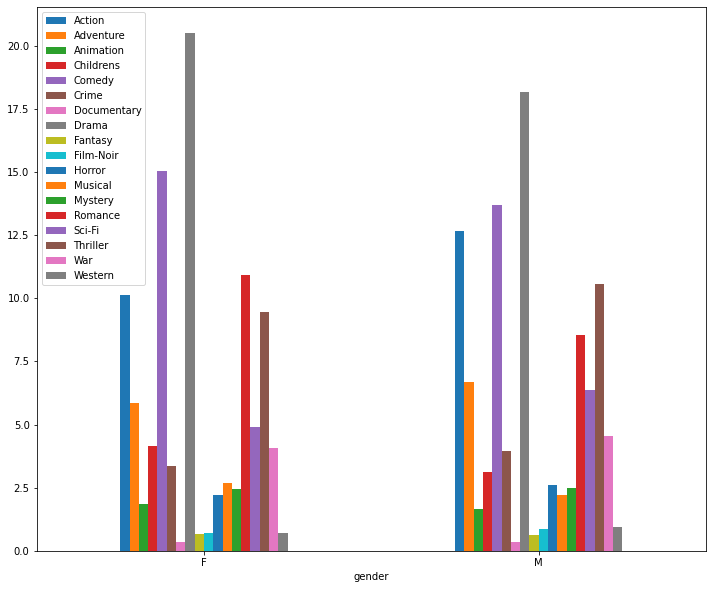

In [182]:
ax = grouped_gender_genre_perc.plot.bar(rot=0, figsize=(12,10))
plt.show()

**Conclusion:**
    


* Men watch more drama than women:

Not true: women have more percent rating on Drama movies (20.5%) than men (18.2 %)

* Women watch more Sci-Fi than men

Not true: women have less percent rating on Sci-Fi movies (4.9%) than men (6.4 %)

* Men watch more Romance than women

Not true: women have more percent rating on Romance movies (10.9%) than men (8.6 %)